In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import io
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf

In [3]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')

In [4]:
# Factors
path_dataset_3d='Tensor_decom_sample/data_1year/'

In [5]:
factor_results = pd.read_csv(path_dataset_3d + "results.csv")

In [6]:
factor_results.shape

(8760, 2)

In [7]:
#factor_results.set_index(factor_results.columns[-1], inplace=True)
#factor_results.shape

In [8]:
factor_results.head()

,timestamp,nooftrips
0,2022-01-02 00:00:00,200
1,2022-01-02 01:00:00,94
2,2022-01-02 02:00:00,41
3,2022-01-02 03:00:00,50
4,2022-01-02 04:00:00,62


In [9]:
# Load features data

In [10]:
features_preproc = pd.read_csv(path_dataset_3d + 'final_features_preproc_12m.csv')
features_preproc.set_index(features_preproc.columns[0],inplace=True)

In [11]:
features_preproc.head()

,temperature,rainfall,snowfall,cloudcover,wind_speed,wind_direction,daytime,London_zone_Central,London_zone_South_East,London_zone_East,...,event_title_Spring bank holiday,event_title_Summer bank holiday,event_title_Survival Sunday (Premier League),event_title_Taste of London,event_title_Trooping the Colour,event_title_UEFA Women Euro Final,event_title_Wimbledon Tennis Championships,event_title_Winter Wonderland,event_title_World Cup 2022 1/4 final,event_title_nan
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-01-02 00:00:00,0.429952,0.010204,0.0,1.0,0.108333,0.523677,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2022-01-02 01:00:00,0.427536,0.010204,0.0,1.0,0.330000,0.662953,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2022-01-02 02:00:00,0.427536,0.000000,0.0,1.0,0.310000,0.668524,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2022-01-02 03:00:00,0.427536,0.000000,0.0,1.0,0.283333,0.688022,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2022-01-02 04:00:00,0.427536,0.000000,0.0,1.0,0.283333,0.688022,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [12]:
features_preproc.dtypes

temperature                                                             float64
rainfall                                                                float64
snowfall                                                                float64
cloudcover                                                              float64
wind_speed                                                              float64
wind_direction                                                          float64
daytime                                                                   int64
London_zone_Central                                                     float64
London_zone_South_East                                                  float64
London_zone_East                                                        float64
London_zone_London_all                                                  float64
London_zone_North                                                       float64
London_zone_South_West                  

In [13]:
features_preproc["event_title_nan"].value_counts()

1.0    6432
0.0    2280
2.0      48
Name: event_title_nan, dtype: int64

In [14]:
def change_2s(x):
    if x == 2:
        x = 1
    elif x == 1:
        x = 1
    else:
        x = 0
    return x

In [15]:
features_preproc["event_title_nan"] = features_preproc["event_title_nan"].apply(change_2s)

In [16]:
features_preproc["event_title_nan"].value_counts()

1    6480
0    2280
Name: event_title_nan, dtype: int64

In [17]:
features_preproc.rename(columns={"event_title_nan": "no_event"}, inplace=True)

In [18]:
features_preproc.drop(columns="minute", inplace=True)

In [19]:
features_preproc.drop(columns="second", inplace=True)

In [20]:
features_preproc.drop(columns="London_zone_London_all", inplace=True)

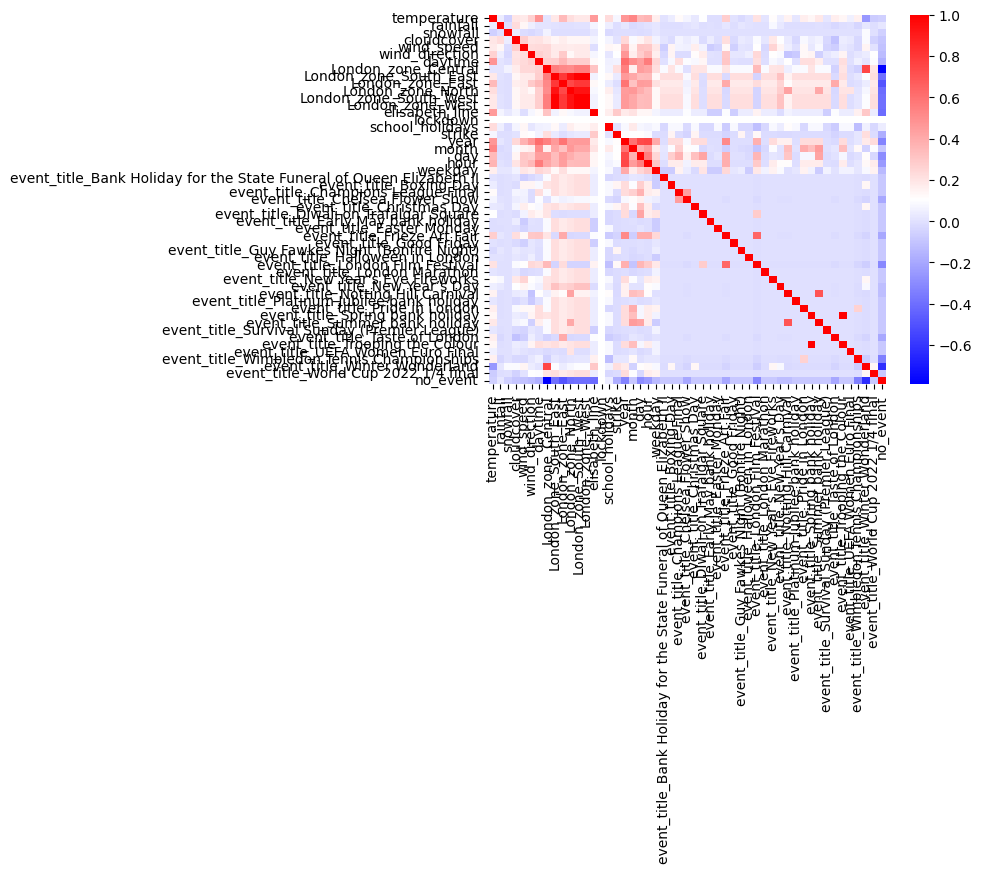

In [21]:
# Heatmap of pairwise correlations
correlation_matrix = features_preproc.corr()
column_names = correlation_matrix.columns
sns.heatmap(correlation_matrix, xticklabels=column_names, yticklabels=column_names,cmap= "bwr");

In [22]:
features_preproc.shape

(8760, 51)

In [23]:
factor_results.shape

(8760, 2)

In [24]:
factor_results.head()

,timestamp,nooftrips
0,2022-01-02 00:00:00,200
1,2022-01-02 01:00:00,94
2,2022-01-02 02:00:00,41
3,2022-01-02 03:00:00,50
4,2022-01-02 04:00:00,62


In [31]:
y = factor_results.set_index("timestamp")

In [32]:
y.shape

(8760, 1)

In [33]:
y.head()

,nooftrips
timestamp,
2022-01-02 00:00:00,200
2022-01-02 01:00:00,94
2022-01-02 02:00:00,41
2022-01-02 03:00:00,50
2022-01-02 04:00:00,62


In [34]:
X = features_preproc

In [35]:
X.head()

,temperature,rainfall,snowfall,cloudcover,wind_speed,wind_direction,daytime,London_zone_Central,London_zone_South_East,London_zone_East,...,event_title_Spring bank holiday,event_title_Summer bank holiday,event_title_Survival Sunday (Premier League),event_title_Taste of London,event_title_Trooping the Colour,event_title_UEFA Women Euro Final,event_title_Wimbledon Tennis Championships,event_title_Winter Wonderland,event_title_World Cup 2022 1/4 final,no_event
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-01-02 00:00:00,0.429952,0.010204,0.0,1.0,0.108333,0.523677,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2022-01-02 01:00:00,0.427536,0.010204,0.0,1.0,0.330000,0.662953,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2022-01-02 02:00:00,0.427536,0.000000,0.0,1.0,0.310000,0.668524,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2022-01-02 03:00:00,0.427536,0.000000,0.0,1.0,0.283333,0.688022,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2022-01-02 04:00:00,0.427536,0.000000,0.0,1.0,0.283333,0.688022,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [36]:
X.shape

(8760, 51)

In [37]:
X.columns

Index(['temperature', 'rainfall', 'snowfall', 'cloudcover', 'wind_speed',
       'wind_direction', 'daytime', 'London_zone_Central',
       'London_zone_South_East', 'London_zone_East', 'London_zone_North',
       'London_zone_South_West', 'London_zone_West', 'elisabeth_line',
       'lockdown', 'school_holidays', 'strike', 'year', 'month', 'day', 'hour',
       'weekday',
       'event_title_Bank Holiday for the State Funeral of Queen Elizabeth II',
       'event_title_Boxing Day', 'event_title_Champions League Final',
       'event_title_Chelsea Flower Show', 'event_title_Christmas Day',
       'event_title_Diwali on Trafalgar Square',
       'event_title_Early May bank holiday', 'event_title_Easter Monday',
       'event_title_Frieze Art Fair', 'event_title_Good Friday',
       'event_title_Guy Fawkes Night (Bonfire Night)',
       'event_title_Halloween in London', 'event_title_London Film Festival',
       'event_title_London Marathon', 'event_title_New Year's Eve Fireworks',
    

In [38]:
merged_df = y.join(features_preproc)

In [39]:
merged_df.head()

,nooftrips,temperature,rainfall,snowfall,cloudcover,wind_speed,wind_direction,daytime,London_zone_Central,London_zone_South_East,...,event_title_Spring bank holiday,event_title_Summer bank holiday,event_title_Survival Sunday (Premier League),event_title_Taste of London,event_title_Trooping the Colour,event_title_UEFA Women Euro Final,event_title_Wimbledon Tennis Championships,event_title_Winter Wonderland,event_title_World Cup 2022 1/4 final,no_event
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-01-02 00:00:00,200,0.429952,0.010204,0.0,1.0,0.108333,0.523677,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2022-01-02 01:00:00,94,0.427536,0.010204,0.0,1.0,0.330000,0.662953,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2022-01-02 02:00:00,41,0.427536,0.000000,0.0,1.0,0.310000,0.668524,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2022-01-02 03:00:00,50,0.427536,0.000000,0.0,1.0,0.283333,0.688022,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2022-01-02 04:00:00,62,0.427536,0.000000,0.0,1.0,0.283333,0.688022,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [40]:
merged_df.shape

(8760, 52)

In [41]:
merged_df.columns

Index(['nooftrips', 'temperature', 'rainfall', 'snowfall', 'cloudcover',
       'wind_speed', 'wind_direction', 'daytime', 'London_zone_Central',
       'London_zone_South_East', 'London_zone_East', 'London_zone_North',
       'London_zone_South_West', 'London_zone_West', 'elisabeth_line',
       'lockdown', 'school_holidays', 'strike', 'year', 'month', 'day', 'hour',
       'weekday',
       'event_title_Bank Holiday for the State Funeral of Queen Elizabeth II',
       'event_title_Boxing Day', 'event_title_Champions League Final',
       'event_title_Chelsea Flower Show', 'event_title_Christmas Day',
       'event_title_Diwali on Trafalgar Square',
       'event_title_Early May bank holiday', 'event_title_Easter Monday',
       'event_title_Frieze Art Fair', 'event_title_Good Friday',
       'event_title_Guy Fawkes Night (Bonfire Night)',
       'event_title_Halloween in London', 'event_title_London Film Festival',
       'event_title_London Marathon', 'event_title_New Year's Eve Fir

In [ ]:
#merged_df.drop(columns="Unnamed: 0", inplace=True)

In [42]:
merged_df.shape

(8760, 52)

In [43]:
# Let's keep the last 40% of the values out for testing purposes
#train_size = 0.6
#train_index = round(train_size*merged_df.shape[0])
#val_size = 0.2
#val_index = train_index + round(val_size*merged_df.shape[0])
#print(train_index, val_index)



5256 7008


In [44]:
#df_train = merged_df.iloc[:train_index]
#df_val = merged_df.iloc[train_index:val_index]
#df_test = merged_df.iloc[val_index:]

In [45]:
#df_train.shape, df_val.shape, df_test.shape

((5256, 52), (1752, 52), (1752, 52))

In [46]:
#df_train.head()

,nooftrips,temperature,rainfall,snowfall,cloudcover,wind_speed,wind_direction,daytime,London_zone_Central,London_zone_South_East,...,event_title_Spring bank holiday,event_title_Summer bank holiday,event_title_Survival Sunday (Premier League),event_title_Taste of London,event_title_Trooping the Colour,event_title_UEFA Women Euro Final,event_title_Wimbledon Tennis Championships,event_title_Winter Wonderland,event_title_World Cup 2022 1/4 final,no_event
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-01-02 00:00:00,200,0.429952,0.010204,0.0,1.0,0.108333,0.523677,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2022-01-02 01:00:00,94,0.427536,0.010204,0.0,1.0,0.330000,0.662953,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2022-01-02 02:00:00,41,0.427536,0.000000,0.0,1.0,0.310000,0.668524,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2022-01-02 03:00:00,50,0.427536,0.000000,0.0,1.0,0.283333,0.688022,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2022-01-02 04:00:00,62,0.427536,0.000000,0.0,1.0,0.283333,0.688022,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [47]:
#df_train.columns

Index(['nooftrips', 'temperature', 'rainfall', 'snowfall', 'cloudcover',
       'wind_speed', 'wind_direction', 'daytime', 'London_zone_Central',
       'London_zone_South_East', 'London_zone_East', 'London_zone_North',
       'London_zone_South_West', 'London_zone_West', 'elisabeth_line',
       'lockdown', 'school_holidays', 'strike', 'year', 'month', 'day', 'hour',
       'weekday',
       'event_title_Bank Holiday for the State Funeral of Queen Elizabeth II',
       'event_title_Boxing Day', 'event_title_Champions League Final',
       'event_title_Chelsea Flower Show', 'event_title_Christmas Day',
       'event_title_Diwali on Trafalgar Square',
       'event_title_Early May bank holiday', 'event_title_Easter Monday',
       'event_title_Frieze Art Fair', 'event_title_Good Friday',
       'event_title_Guy Fawkes Night (Bonfire Night)',
       'event_title_Halloween in London', 'event_title_London Film Festival',
       'event_title_London Marathon', 'event_title_New Year's Eve Fir

In [ ]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [48]:
#X_train =  df_train.iloc[:,136:]
#X_train = np.asarray(X_train).astype("float32")
#X_val = df_val.iloc[:,136:]
#X_val = np.array(X_val).astype("float32")
#X_test = df_test.iloc[:,136:]
#X_test = np.asarray(X_test).astype("float32")
#y_train = df_train.iloc[:,0:136]
#y_train = np.asarray(y_train).astype("float32")
#y_val = df_val.iloc[:,0:136]
#y_val = np.asarray(y_val).astype("float")
#y_test =  df_test.iloc[:,0:136]
#y_test = np.asarray(y_test).astype("float32")

In [ ]:
# X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
# X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [49]:
training_set_size = int(len(merged_df)*0.75)
test_set_size = len(merged_df)-training_set_size
training_set,test_set = merged_df.iloc[0:training_set_size],merged_df.iloc[training_set_size:len(merged_df)]
print("Length of training set is", len(training_set))
print("Length of test set is",len(test_set))

Length of training set is 6570
Length of test set is 2190


In [71]:
from sklearn.preprocessing import StandardScaler
cnt_transformer = StandardScaler().fit(training_set[['nooftrips']])

training_set['nooftrips'] = cnt_transformer.transform(training_set[['nooftrips']])

test_set['nooftrips'] = cnt_transformer.transform(test_set[['nooftrips']])

<ipython-input-71-8111f3568f2d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_set['nooftrips'] = cnt_transformer.transform(training_set[['nooftrips']])
<ipython-input-71-8111f3568f2d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['nooftrips'] = cnt_transformer.transform(test_set[['nooftrips']])


In [72]:
def create_data_sequence(X, y, time_steps=1):
    """ Create data sequence

    Arguments:
        * X: time-series data
        * y: Count "cnt" value
        * time_steps: Used to create input sequence of timesteps

    Returns:
        * input_sequence: Numpy array of sequences of time-series data
        * output: Numpy array of output i.e. next value for respective sequence

    """
    input_sequence, output = [], []
    for i in range(len(X) - time_steps):
        sequence = X.iloc[i:(i + time_steps)].values
        input_sequence.append(sequence)
        output.append(y.iloc[i + time_steps])
    return np.array(input_sequence), np.array(output)

In [73]:
time_steps = 7

# Here training_set_sequence, test_set_sequence are input features for training and test set, as numpy arrays.
# training_set_output and test_set_output are "cnt" values for training and test set sequences, as numpy arrays.
training_set_sequence, training_set_output = create_data_sequence(training_set, training_set.nooftrips, time_steps)
test_set_sequence, test_set_output = create_data_sequence(test_set, test_set.nooftrips, time_steps)

# We get training and test set sequences as [samples, time_steps, n_features]

print("Training data shape", training_set_sequence.shape, "Training data output shape", training_set_output.shape)
print("Test data shape", test_set_sequence.shape, "Test data output shape", test_set_output.shape)

Training data shape (6563, 7, 52) Training data output shape (6563,)
Test data shape (2183, 7, 52) Test data output shape (2183,)


In [74]:
# 0- Imports
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Normalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Flatten, Dropout
from matplotlib import pyplot

In [75]:
def machine_learning_model():
    """Defines machine learning model

    Returns:
        * model: LSTM model

    """
    model = Sequential()
    model.add(layers.LSTM(units=128, activation="tanh", input_shape=(training_set_sequence.shape[1], training_set_sequence.shape[2])))
    model.add(layers.Dropout(rate=0.2))
    model.add(layers.Dense(units=1))
    model.compile(loss='mse', optimizer=Adam(learning_rate=0.01), metrics=["accuracy"])
    model.summary()
    return model

In [76]:
model = machine_learning_model()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 128)               92672     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 92,801
Trainable params: 92,801
Non-trainable params: 0
_________________________________________________________________


In [77]:
history = model.fit(
    training_set_sequence,
    training_set_output,
    epochs=50,
    batch_size=64,
    validation_split=0.3,
    shuffle=False,
)

Epoch 1/50
72/72 [==============================] - 7s 45ms/step - loss: 1.1292 - accuracy: 0.0000e+00 - val_loss: 1.0357 - val_accuracy: 0.0000e+00
Epoch 2/50
72/72 [==============================] - 2s 32ms/step - loss: 1.0783 - accuracy: 0.0000e+00 - val_loss: 1.0432 - val_accuracy: 0.0000e+00
Epoch 3/50
72/72 [==============================] - 2s 31ms/step - loss: 1.0506 - accuracy: 0.0000e+00 - val_loss: 1.0445 - val_accuracy: 0.0000e+00
Epoch 4/50
72/72 [==============================] - 4s 55ms/step - loss: 1.0427 - accuracy: 0.0000e+00 - val_loss: 1.0426 - val_accuracy: 0.0000e+00
Epoch 5/50
72/72 [==============================] - 4s 55ms/step - loss: 1.0341 - accuracy: 0.0000e+00 - val_loss: 1.0398 - val_accuracy: 0.0000e+00
Epoch 6/50
72/72 [==============================] - 2s 31ms/step - loss: 1.0316 - accuracy: 0.0000e+00 - val_loss: 1.0372 - val_accuracy: 0.0000e+00
Epoch 7/50
72/72 [==============================] - 2s 31ms/step - loss: 1.0282 - accuracy: 0.0000e+00 - v

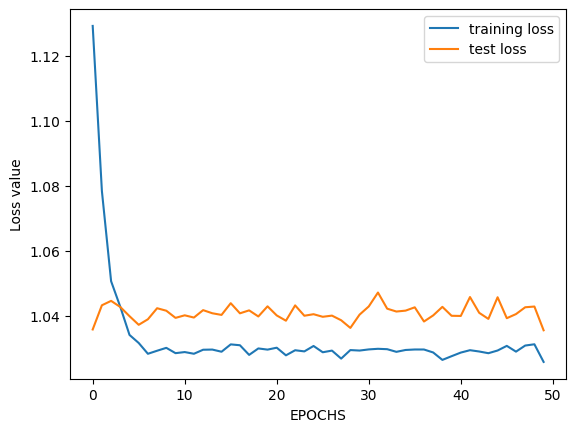

In [78]:
fig,ax = plt.subplots()
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='test loss')
ax.set_xlabel('EPOCHS')
ax.set_ylabel('Loss value')
plt.legend();

In [83]:
test_set_predictions = model.predict(test_set_sequence)

69/69 [==============================] - 1s 8ms/step


In [85]:
model_predictions = cnt_transformer.inverse_transform(test_set_predictions)

In [88]:
test_set_output.shape

(2183,)

In [86]:
#actual_testset_values = cnt_transformer.inverse_transform(test_set_output)

ValueError: ignored

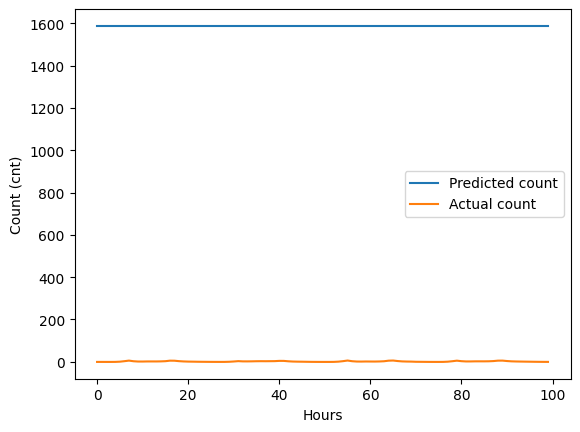

In [89]:
fig,ax = plt.subplots()
plt.plot(model_predictions[:100,], label='Predicted count')
plt.plot(test_set_output[:100,], label='Actual count')
ax.set_xlabel('Hours')
ax.set_ylabel('Count (cnt)')
plt.legend();
plt.show()

In [ ]:
#X_train.shape, y_train.shape

In [ ]:
# X_train = tf.expand_dims(X_train, -1)
# X_test = tf.expand_dims(X_test, -1)

In [ ]:
# X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
# X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
# X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
#X_train.shape , X_test.shape

In [ ]:
# 1- RNN Architecture
model = Sequential()
model.add(layers.LSTM(units=500, activation='tanh',input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(layers.Dense(400))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(300))
model.add(layers.Dense(250))
model.add(layers.Dense(136, activation="linear"))

In [ ]:
# 2- Compilation
model.compile(loss='mae',
              optimizer=Adam(learning_rate=0.01),metrics=['accuracy']) # very high lr so we can converge with such a small dataset

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=10, restore_best_weights=True)

# 3- Fit
history = model.fit(X_train, y_train, epochs=50,validation_data = (X_val, y_val),verbose=1, callbacks=[es])


In [ ]:
# 4- Predict
model.evaluate(X_test,y_test)

In [ ]:
# plot history
pyplot.plot(history.history['loss'][1:], label='train')
pyplot.plot(history.history['val_loss'][1:], label='validation')
pyplot.legend()
pyplot.show()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

In [ ]:
y_pred.shape